Notebook based on _Hands-On Graph Neural Networks Using Python_, by Maxime Labonne.

# Ch 6. Introducing Graph Convolutional Networks

In [1]:
import networkx as nx

We return to the node embedding calculation from chapter 5:

$$
h_i = \sum_{j \in \mathscr{N}_i} {x_j W^T}
$$

where $i$ is a node and $\mathscr{N}_i$ is the set of neighbors of node $i$.

We noted that there is no normalization coefficient here, so nodes with a large number of neighbors will generally have a larger embedding value than nodes with a smaller number of neighbors. This makes it harder to compare the embeddings. We can address this issue by introducing a normalization coefficient.

$$
h_i = \frac{1}{\deg{i}} \sum_{j \in \mathscr{N}_i} {x_j W^T}
$$

We've essentially transformed this from a sum into a mean.

Let's work with a concrete example.

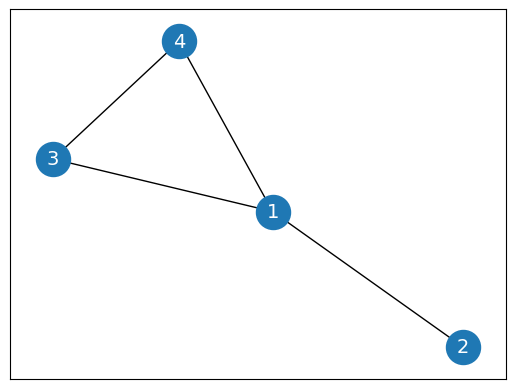

In [5]:
graph = nx.Graph()
graph.add_edges_from([('1', '2'), ('1', '3'), ('1', '4'), ('3', '4')])
nx.draw_networkx(
    graph,
    pos=nx.spring_layout(graph, seed=0),
    node_size=600,
    font_size=14,
    font_color='white')

Here's the _degree matrix_ $D$ for our graph:

$$
D = 
\begin{pmatrix}
3 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 2 & 0 \\
0 & 0 & 0 & 2 \\
\end{pmatrix}
$$

Recall from chapter 5 that we modified our adjacency matrix $A$ by adding self-loops: $\tilde{A} = A + I$. This allows an embedding in layer $k$ to be influenced by the corresponding embedding in layer $k-1$ (as opposed to being influenced only by neighbors). But because we added self-loops to every node, we have to add the identity matrix to the degree matrix: $\tilde{D} = D + I$:

$$
\tilde{D} = 
\begin{pmatrix}
4 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 \\
0 & 0 & 3 & 0 \\
0 & 0 & 0 & 3 \\
\end{pmatrix}
$$

And now we can get the normalizing matrix by inverting $\tilde{D}$:

$$
\tilde{D}^{-1} = 
\begin{pmatrix}
\frac{1}{4} & 0 & 0 & 0 \\
0 & \frac{1}{2} & 0 & 0 \\
0 & 0 & \frac{1}{3} & 0 \\
0 & 0 & 0 & \frac{1}{3} \\
\end{pmatrix}
$$

Now $\tilde{D}^{-1}\tilde{A}$ will normalize every row of features:

$$
\tilde{D}^{-1}\tilde{A}
$$

## 6.x Further reading

- [Spectral Networks and Locally Connected Networks on Graphs](https://arxiv.org/abs/1312.6203)
- [Convolutional Neural Networks on Graphs with Fast Localized Spectral Filtering](https://arxiv.org/abs/1606.09375)
- [Semi-Supervised Classification with Graph Convolutional Networks](https://arxiv.org/abs/1609.02907)